# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt

In [3]:
online_rt = pd.read_csv('Online_Retail.csv', encoding='cp1251')
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

In [7]:
a = online_rt[online_rt['Country']!='United Kingdom'].groupby(['Country'])['Quantity'].sum()
a = a.sort_values(ascending=False)

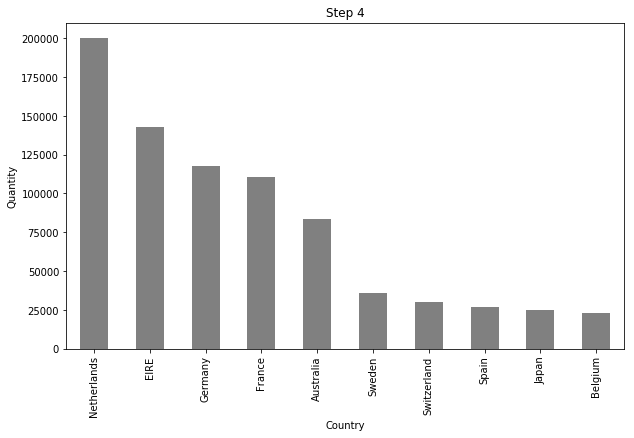

In [22]:
a.iloc[:10].plot(kind='bar', color='grey', figsize=(10, 6));
plt.ylabel('Quantity')
plt.title("Step 4");

### Step 5.  Exclude negative Quatity entries

In [23]:
online_rt_pos = online_rt[online_rt['Quantity']>=0]

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

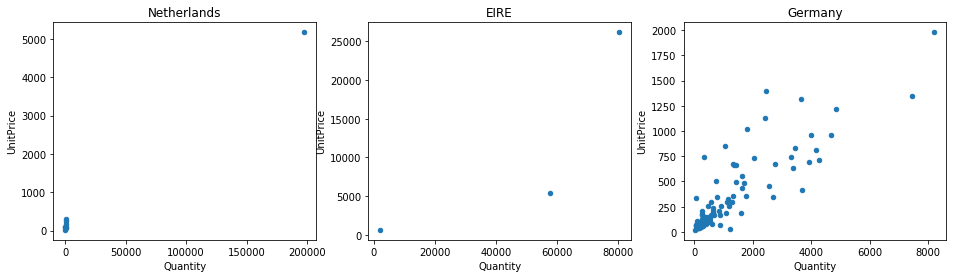

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for i in range(3):
    country = online_rt_pos[online_rt_pos['Country'] == a.index[i]].groupby('CustomerID').sum()
    country.plot(kind='scatter', x='Quantity', y='UnitPrice', ax=axes[i], title=a.index[i]);

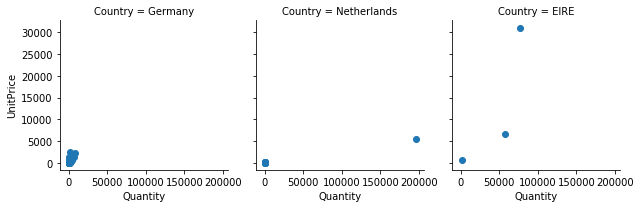

In [64]:
top_countries =  ['Netherlands', 'EIRE', 'Germany']

customers = online_rt.groupby(['CustomerID','Country']).sum()
customers = customers[customers.index.get_level_values(1).isin(top_countries)]
customers['Country'] = customers.index.get_level_values(1)

g = sns.FacetGrid(customers, col="Country")
g.map(plt.scatter, "Quantity", "UnitPrice");

### BONUS: Create your own question and answer it.